In [19]:
# first goal is to iterate through the APA air quality index api to attain the identifier codes for each state
# import the requests module
import requests
# specify the userID and key used to access the API
user = "emilyweingardt42@gmail.com"
key = "ochregazelle61"
# specify the root URL
rootURL = "https://aqs.epa.gov/data/api/"

# open the list of states
statesRequest = requests.get(rootURL+"list/states?email="+user+"&key="+key).json()
# return statesRequest
statesRequest # this returns a dictionary where the values are lists of other dictionaries

{'Header': [{'status': 'Success',
   'request_time': '2023-05-03T19:24:15-04:00',
   'url': 'https://aqs.epa.gov/data/api/list/states?email=emilyweingardt42@gmail.com&key=ochregazelle61',
   'rows': 56}],
 'Data': [{'code': '01', 'value_represented': 'Alabama'},
  {'code': '02', 'value_represented': 'Alaska'},
  {'code': '04', 'value_represented': 'Arizona'},
  {'code': '05', 'value_represented': 'Arkansas'},
  {'code': '06', 'value_represented': 'California'},
  {'code': '08', 'value_represented': 'Colorado'},
  {'code': '09', 'value_represented': 'Connecticut'},
  {'code': '10', 'value_represented': 'Delaware'},
  {'code': '11', 'value_represented': 'District Of Columbia'},
  {'code': '12', 'value_represented': 'Florida'},
  {'code': '13', 'value_represented': 'Georgia'},
  {'code': '15', 'value_represented': 'Hawaii'},
  {'code': '16', 'value_represented': 'Idaho'},
  {'code': '17', 'value_represented': 'Illinois'},
  {'code': '18', 'value_represented': 'Indiana'},
  {'code': '19', 

In [20]:
# create a dictionary to save the state and its carbon monoxide levels
coDict = {}

# create a for loop to iterate through this dictionary to get the code for each state, then use it in a subsequent request
for i in range(0,len(statesRequest["Data"])):
    # save the code to stateCode
    stateCode = statesRequest["Data"][i]["code"]
    # save the state name
    stateName = statesRequest["Data"][i]["value_represented"]
    # assign the value of the stateName key in the dictionary to an empty list
    coDict[stateName] = []
    # use stateCode as the "state" parameter in a subsequent request
    # I will focus on the year 2012 and the pollutant carbon monoxide (code is 42101)
    # bdate is the beginning date and edate is the end date
    carbonMonoxideRequest = requests.get(rootURL+"sampleData/byState?email="+user+"&key="+key+"&param=42101&bdate=20120515&edate=20120515&state="+stateCode).json()
    # this returns another nested dictionary
    # use an empty counter to keep track of the state's amount of carbon monoxide
    coCounter = 0.0
    # access the measured amount of carbon monoxide at each collection site in the state using the key "sample_measurement"
    if "Data" in carbonMonoxideRequest:
        # use a for loop to iterate through each dictionary in the list of dictionaries
        for m in range(0,len(carbonMonoxideRequest["Data"])):
            # if the data type of the measurement is not NoneType, add it to the counter
            if type(carbonMonoxideRequest["Data"][m]["sample_measurement"]) is float:
                # access the measurement value and add it to the coCounter
                coCounter += carbonMonoxideRequest["Data"][m]["sample_measurement"]
        if len(carbonMonoxideRequest["Data"]) >0:
            # divide coCounter by the number of samples to get the average CO level for the state
            avgCOLevel = int(coCounter)/len(carbonMonoxideRequest["Data"])
            # save this as the value to the corresponding stateName in coDict
            coDict[stateName].append(avgCOLevel)
            # since there are multiple sites samples are drawn from, use the latitude and longitude from the first site listed
            # for the state
            # append longitude and latitude
            coDict[stateName].append(carbonMonoxideRequest["Data"][0]["latitude"])
            coDict[stateName].append(carbonMonoxideRequest["Data"][0]["longitude"])
    else:
        # append it to the value list as 0 in the dictionary, indicating that there is no data for the state
        coDict[stateName].append(0)
    
# return coDict
coDict

{'Alabama': [0.2708333333333333, 33.565278, -86.796389],
 'Alaska': [0.25, 64.84569, -147.727413],
 'Arizona': [0.2261904761904762, 32.29515, -110.9823],
 'Arkansas': [0.3541666666666667, 34.756189, -92.281296],
 'California': [0.2358431860609832, 32.791194, -116.942092],
 'Colorado': [0.21296296296296297, 40.882222, -106.306111],
 'Connecticut': [0.2361111111111111, 41.821342, -73.297257],
 'Delaware': [0.22916666666666666, 39.739444, -75.558056],
 'District Of Columbia': [0.5833333333333334, 38.921847, -77.013178],
 'Florida': [0.20833333333333334, 25.622049, -80.344255],
 'Georgia': [0.3194444444444444, 33.6878, -84.2905],
 'Hawaii': [0.53125, 21.30758, -157.85542],
 'Idaho': [0.16666666666666666, 43.616379, -116.203817],
 'Illinois': [0.42592592592592593, 42.267674, -89.087851],
 'Indiana': [0.6458333333333334, 37.97768, -87.596836],
 'Iowa': [0.18055555555555555, 41.603159, -93.643118],
 'Kansas': [0.3333333333333333, 39.117219, -94.635605],
 'Kentucky': [0.18055555555555555, 38.2

In [21]:
# import pandas, numpy, and seaborn
import pandas as pd
import numpy as np
import seaborn as sb
import altair as alt # this will be for visualizing the geographic data above

In [22]:
# convert the coDict to a dataframe within pandas
coDF = pd.DataFrame.from_dict(coDict,orient="index")
# documentation
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html
# this converts a dictionary into a pandas dataframe
# the column is the index of the value in the dictionary (this is where the "orient" parameter comes from)

# change the name of the column
coDF.columns = ["Carbon Monoxide (ppm)","Latitude","Longitude"]
# filter out states that have NaN as a value for any of the columns
carbonDF = coDF.dropna()
carbonDF.index.name = "State" 
# https://stackoverflow.com/questions/40914200/can-i-assign-a-reset-index-a-name
# reset the name of the index by using index.name then specifying the name of the index
# then follow that by resetting the index, creating the new state column label
carbonDF = carbonDF.reset_index()
carbonDF

,State,Carbon Monoxide (ppm),Latitude,Longitude
0,Alabama,0.270833,33.565278,-86.796389
1,Alaska,0.250000,64.845690,-147.727413
2,Arizona,0.226190,32.295150,-110.982300
3,Arkansas,0.354167,34.756189,-92.281296
4,California,0.235843,32.791194,-116.942092
5,Colorado,0.212963,40.882222,-106.306111
6,Connecticut,0.236111,41.821342,-73.297257
7,Delaware,0.229167,39.739444,-75.558056
8,District Of Columbia,0.583333,38.921847,-77.013178
9,Florida,0.208333,25.622049,-80.344255


In [23]:
from vega_datasets import data

# upload the data necessary to get states visualization
states = alt.topo_feature(data.us_10m.url, feature='states')
# use states as the input to make a chart using altair
# fill sets the fill color as light gray and stroke sets the outline to white
# project("albersUSA") uses an image of the USA to project the colored image
background = alt.Chart(states).mark_geoshape(fill="lightGray",stroke="white").project("albersUsa").properties(width=800,height=650)

# create the points for a scatterplot
points = alt.Chart(carbonDF).mark_circle(opacity=0.65).encode(longitude="Longitude:Q",latitude="Latitude:Q",size=alt.Size("Carbon Monoxide (ppm):Q",scale=alt.Scale(range=[100,2000])),tooltip=["State:N","Carbon Monoxide (ppm):Q"])
# alt.Chart will turn the dataframe into a chart
# the circles will have an opacity of 0.65
# the location on the map (the background) is determined/encoded by the latitude and longitude values
# the size of the points will be determined by the average Carbon monoxide measured in 2012
# tooltip will enable you to mouse over each point and view information about the state name and the average carbon monoxide detected

background + points

# layer the points over the background

# the chart provides a general sense of how much carbon monoxide there is across the country
# it is generally equal
# the point in the upper left corner is Puerto Rico, which is not on the map and it has the highest average CO levels in 2012

alt.LayerChart(...)

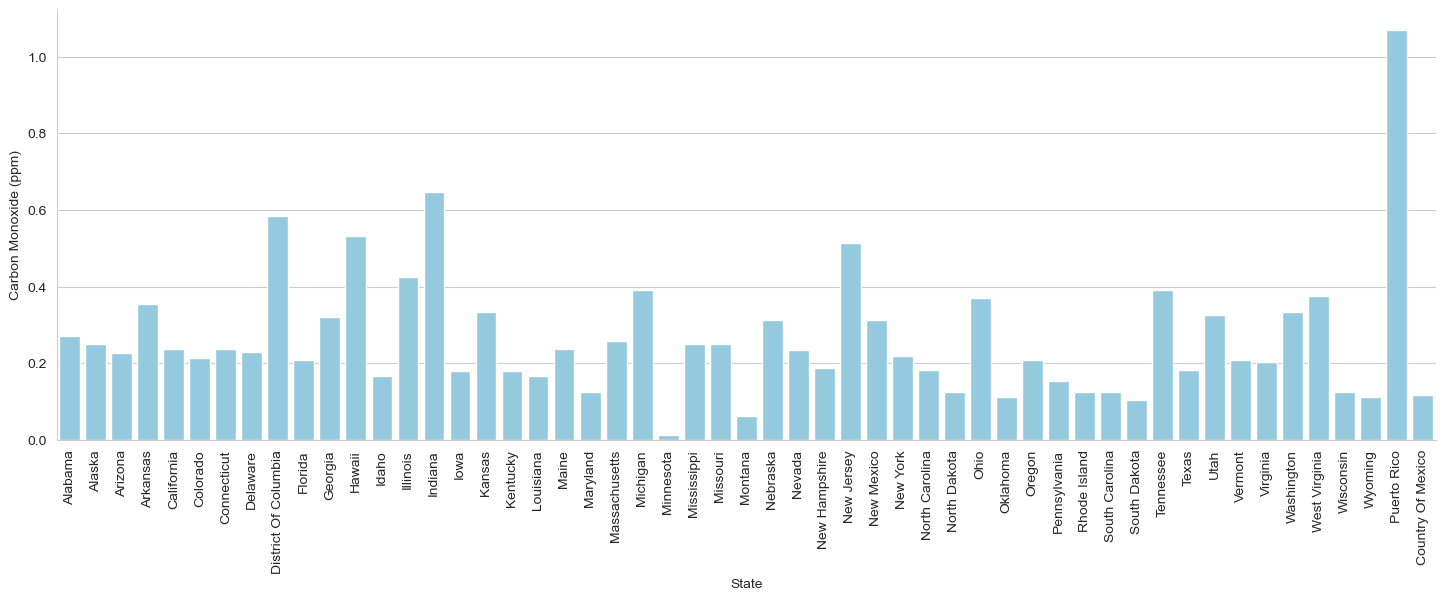

In [24]:
# visualize the above data more clearly with a bar chart
# use seaborn
sb.set_style("whitegrid") # this puts in lines, helpful for wide chart
sb.catplot(x="State",y="Carbon Monoxide (ppm)",data=carbonDF,kind="bar",aspect=3,color="skyBlue").set_xticklabels(rotation=90)
# aspect refers to the aspect ratio, set the color to skyBlue to make it more visually appealing
# set_xticklabels will rotate the tick labels by 90 degrees so they are sideways and therefore more readable

# after Puerto Rico, Indiana and District of Columbia have the highest CO levels in 2012

In [25]:
# next goal is to visualize O3 (ozone) levels over time for the entire United States
# create an empty dictionary to store the ozone values for each year
o3Dict = {}

# create a for loop to iterate through the years (2005-2021, chosen arbitrarily)
for year in range(2005,2021):
    # create a counter to store the total ozone in a single year
    singleYearTotalOzone = 0
    for i in range(0,len(statesRequest["Data"])):
        # use statesRequest to get the code for the state
        stateCode = statesRequest["Data"][i]["code"]
        # the code for ozone is 44201
        # include the year in the for loop as a paramter, as well as the stateCode
        ozoneRequest = requests.get(rootURL+"sampleData/byState?email="+user+"&key="+key+"&param=44201&bdate="+str(year)+"0515&edate="+str(year)+"0515&state="+stateCode).json()
        # this returns another nested dictionary
        # use an empty counter to keep track of the state's amount of ozone
        ozoneCounter = 0.0
        # access the measured amount of ozone at each collection site in the state using the key "sample_measurement"
        if "Data" in ozoneRequest:
            # use a for loop to iterate through each dictionary in the list of dictionaries
            for m in range(0,len(ozoneRequest["Data"])):
                # if the data type of the measurement is a float, add it to the counter
                if type(ozoneRequest["Data"][m]["sample_measurement"]) is float:
                    # access the measurement value and add it to the coCounter
                    ozoneCounter += ozoneRequest["Data"][m]["sample_measurement"]
            if len(ozoneRequest["Data"]) >0:
                # divide coCounter by the number of samples to get the average ozone level for the state in a year
                # add this number to the total ozone for the year
                # this will add up the total ozone for all states for the current year
                singleYearTotalOzone += int(ozoneCounter)/len(ozoneRequest["Data"])
                
    # add the year as a key and the totalOzone as the value to the dictionary
    o3Dict[year] = singleYearTotalOzone
    
# return coDict
o3Dict

{2005: 1.5664925545372956,
 2006: 1.4575087437991339,
 2007: 1.9754631355998358,
 2008: 1.5661036538423334,
 2009: 1.4134210278821857,
 2010: 1.657560146092958,
 2011: 1.468122235960637,
 2012: 1.8131521606676957,
 2013: 1.9727863493175781,
 2014: 1.5223565566307276,
 2015: 1.6042422068221116,
 2016: 1.550337757680997,
 2017: 1.7750241803888875,
 2018: 1.5998397244080649,
 2019: 1.589210447275733,
 2020: 1.6985550736590596}

In [26]:
ozoneRequest = requests.get(rootURL+"sampleData/byState?email="+user+"&key="+key+"&param=44201&bdate=20120515&edate=20120515&state=01").json()
ozoneRequest # this is for reference
# this is Alabama's ozone data for 2012

{'Header': [{'status': 'Success',
   'request_time': '2023-05-03T19:32:27-04:00',
   'url': 'https://aqs.epa.gov/data/api/sampleData/byState?email=emilyweingardt42@gmail.com&key=ochregazelle61&param=44201&bdate=20120515&edate=20120515&state=01',
   'rows': 576}],
 'Data': [{'state_code': '01',
   'county_code': '073',
   'site_number': '1009',
   'parameter_code': '44201',
   'poc': 1,
   'latitude': 33.459722,
   'longitude': -87.305556,
   'datum': 'WGS84',
   'parameter': 'Ozone',
   'date_local': '2012-05-15',
   'time_local': '00:00',
   'date_gmt': '2012-05-15',
   'time_gmt': '06:00',
   'sample_measurement': 0.017,
   'units_of_measure': 'Parts per million',
   'units_of_measure_code': '007',
   'sample_duration': '1 HOUR',
   'sample_duration_code': '1',
   'sample_frequency': 'HOURLY',
   'detection_limit': 0.005,
   'uncertainty': None,
   'qualifier': None,
   'method_type': 'FEM',
   'method': 'INSTRUMENTAL - ULTRA VIOLET ABSORPTION',
   'method_code': '087',
   'state': '

In [27]:
# convert o3Dict to a dataframe so it can be visualized
o3DF = pd.DataFrame.from_dict(o3Dict,orient="index")
# set a new name to the index using the same method as above
o3DF.index.name = "Year"
# reset the index so the year can be its own column
ozoneDF = o3DF.reset_index()
# rename the columns
ozoneDF.columns = ["Year","Total Ozone (ppm)"]
ozoneDF # return the new dataframe

,Year,Total Ozone (ppm)
0,2005,1.566493
1,2006,1.457509
2,2007,1.975463
3,2008,1.566104
4,2009,1.413421
5,2010,1.657560
6,2011,1.468122
7,2012,1.813152
8,2013,1.972786
9,2014,1.522357


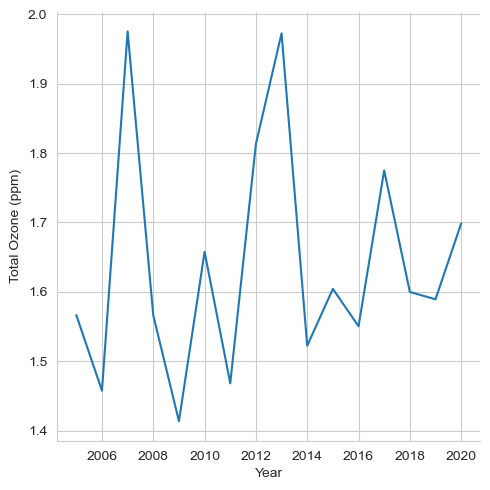

In [28]:
# graph this data over time (this is a continuous variable) so graph it with a line graph
sb.relplot(x="Year",y="Total Ozone (ppm)",data=ozoneDF,kind="line")
# use relplot instead of catplot to get a line chart that connects the points together
# this chart shows higher relative ozone levels in 2007 and 2013 in the US

In [29]:
# is there a visual correlation between carbon monoxide levels and ozone levels from 2005 to 2020?

# use the same code to create a dataframe for carbon monoxide levels during these years
# create an empty dictionary to store the carbon monoxide values for each year
carbonMDict = {}

# create a for loop to iterate through the years (2005-2021, chosen arbitrarily)
for year in range(2005,2021):
    # create a counter to store the total ozone in a single year
    singleYearTotalCO = 0
    for i in range(0,len(statesRequest["Data"])):
        # use statesRequest to get the code for the state
        stateCode = statesRequest["Data"][i]["code"]
        # the code for carbon monoxide is 42101
        # include the year in the for loop as a paramter, as well as the stateCode
        coRequest = requests.get(rootURL+"sampleData/byState?email="+user+"&key="+key+"&param=42101&bdate="+str(year)+"0515&edate="+str(year)+"0515&state="+stateCode).json()
        # this returns another nested dictionary
        # use an empty counter to keep track of the state's amount of carbon monoxide
        coCounter = 0.0
        # access the measured amount of carbon monoxide at each collection site in the state using the key "sample_measurement"
        if "Data" in coRequest:
            # use a for loop to iterate through each dictionary in the list of dictionaries
            for m in range(0,len(coRequest["Data"])):
                # if the data type of the measurement is a float, add it to the counter
                if type(coRequest["Data"][m]["sample_measurement"]) is float:
                    # access the measurement value and add it to the coCounter
                    coCounter += coRequest["Data"][m]["sample_measurement"]
            if len(coRequest["Data"]) >0:
                # divide coCounter by the number of samples to get the average CO level for the state in a year
                # add this number to the total ozone for the year
                # this will add up the total ozone for all states for the current year
                singleYearTotalCO += int(coCounter)/len(coRequest["Data"])
                
    # add the year as a key and the totalOzone as the value to the dictionary
    carbonMDict[year] = singleYearTotalCO
    
# return coDict
carbonMDict

{2005: 18.509124133850168,
 2006: 18.745476057095242,
 2007: 18.811598778713737,
 2008: 15.986361650291316,
 2009: 16.099664952332564,
 2010: 14.980872746523785,
 2011: 10.297339160512882,
 2012: 14.06806978620171,
 2013: 12.114904068862689,
 2014: 11.18539395806984,
 2015: 12.433225409855842,
 2016: 10.6213273994524,
 2017: 10.819922993412117,
 2018: 11.219562799114822,
 2019: 10.527536217112413,
 2020: 11.475330687830686}

In [30]:
# convert the dictionary to a pandas dataframe
carbDF = pd.DataFrame.from_dict(carbonMDict,orient="index")
# rename the index
carbDF.index.name = "Year"
# reset the index then rename the columns
carbonDF = carbDF.reset_index()
carbonDF.columns = ["Year","Total Carbon Monoxide (ppm)"]
carbonDF # return the dataframe

,Year,Total Carbon Monoxide (ppm)
0,2005,18.509124
1,2006,18.745476
2,2007,18.811599
3,2008,15.986362
4,2009,16.099665
5,2010,14.980873
6,2011,10.297339
7,2012,14.068070
8,2013,12.114904
9,2014,11.185394


In [31]:
# merge the two dataframes using pd.merge
# the first argument is the ozoneDF and the second argument is the carbonDF
# they will be merged on the year to create a new DF, which can then be visualized
pollutantsDF = pd.merge(ozoneDF,carbonDF,on="Year")
pollutantsDF

,Year,Total Ozone (ppm),Total Carbon Monoxide (ppm)
0,2005,1.566493,18.509124
1,2006,1.457509,18.745476
2,2007,1.975463,18.811599
3,2008,1.566104,15.986362
4,2009,1.413421,16.099665
5,2010,1.657560,14.980873
6,2011,1.468122,10.297339
7,2012,1.813152,14.068070
8,2013,1.972786,12.114904
9,2014,1.522357,11.185394


Text(0, 0.5, 'Total Carbon Monoxide (ppm)')

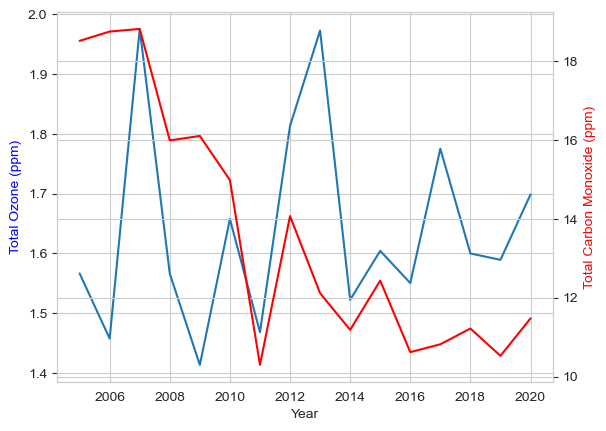

In [32]:
# use sb.catplot with kind="point" (similar to line graph, but shows the points)
# set hue equal to pollutant to set the line color to correspond to the type of pollutant
# graph them on the same axes using matplotlib
import matplotlib.pyplot as plt

# use sb.lineplot
fig,ax1 = plt.subplots()
# subplots returns two values in a tuple for when we have two variables separated by commas
ax1 = sb.lineplot(x="Year",y="Total Ozone (ppm)",data=pollutantsDF,ax=ax1)
ax2 = ax1.twinx() # this creates a second axis object with the two plots sharing the x axis
sb.lineplot(x="Year",y="Total Carbon Monoxide (ppm)",data=pollutantsDF,ax=ax2,color="red") # color sets it to red

# set the labels so they correspond to the colots of the lines
ax1.set_ylabel("Total Ozone (ppm)",color="blue") # specify the label then the color
ax2.set_ylabel("Total Carbon Monoxide (ppm)",color="red") # this makes the graph easier to read

# the graph shows that there is little correlation between the two variables (visually)
# ozone stays at the same relative level whereas carbon monoxide decreases over time

In [33]:
# perform a Pearson's R correlation to see if the two variables are related to each other
# documentation
# https://stackabuse.com/calculating-pearson-correlation-coefficient-in-python-with-numpy/
# in this process, you convert each of the intended series into an array with numpy
# you then input both the variables into the function to make a correlation array
# "1" in the array corresponds to a variable's relationship to itself and the other number is the correlation

# specify the two variables that will be inputted into the function
ozone = np.array(pollutantsDF["Total Ozone (ppm)"]) # specify the dataframe then the column
carbonMonoxide = np.array(pollutantsDF["Total Carbon Monoxide (ppm)"])

correlation = np.corrcoef(ozone,carbonMonoxide)
correlation 
# there is a 0.02 r value (correlation coefficient), so there is a very weak positive correlation
# between the variables

array([[1.       , 0.0287981],
       [0.0287981, 1.       ]])

In [34]:
# now determine how cancer rates have changed over the same time period
pd.options.display.max_columns = 200 # sets the maximum number of columns displayed to 200
# use pandas to open the csv file
cancerDF = pd.read_csv("U.S._Chronic_Disease_Indicators__Cancer.csv")
newCancerDF = cancerDF[["YearStart","LocationAbbr","LocationDesc","DataValueType","DataValue"]] # specify only the needed columns

In [35]:
# clean up the dataframe by removing NaN values
cleanCancerDF = newCancerDF.dropna()
cleanCancerDF

,YearStart,LocationAbbr,LocationDesc,DataValueType,DataValue
0,2008,NY,New York,Average Annual Number,329.0
1,2009,NY,New York,Average Annual Number,336.0
2,2011,NY,New York,Average Annual Number,344.0
3,2012,NY,New York,Average Annual Number,354.0
4,2012,CO,Colorado,Average Annual Number,454.0
...,...,...,...,...,...
176331,2020,WY,Wyoming,Age-adjusted Prevalence,65.3
176333,2020,WY,Wyoming,Age-adjusted Prevalence,63.9
176334,2020,WY,Wyoming,Age-adjusted Prevalence,72.6
176336,2020,WY,Wyoming,Crude Prevalence,49.8


In [36]:
# since they all have different types of data measurement, create a a boolean mask to only
# include the values with a datavalueType of "average annual number"
avgCancerDF = cleanCancerDF[cleanCancerDF["DataValueType"]=="Average Annual Number"]
avgCancerDF

,YearStart,LocationAbbr,LocationDesc,DataValueType,DataValue
0,2008,NY,New York,Average Annual Number,329.0
1,2009,NY,New York,Average Annual Number,336.0
2,2011,NY,New York,Average Annual Number,344.0
3,2012,NY,New York,Average Annual Number,354.0
4,2012,CO,Colorado,Average Annual Number,454.0
...,...,...,...,...,...
159712,2012,NJ,New Jersey,Average Annual Number,233.0
159723,2009,DC,District of Columbia,Average Annual Number,4.0
159731,2011,MN,Minnesota,Average Annual Number,55.0
159732,2014,DC,District of Columbia,Average Annual Number,5.0


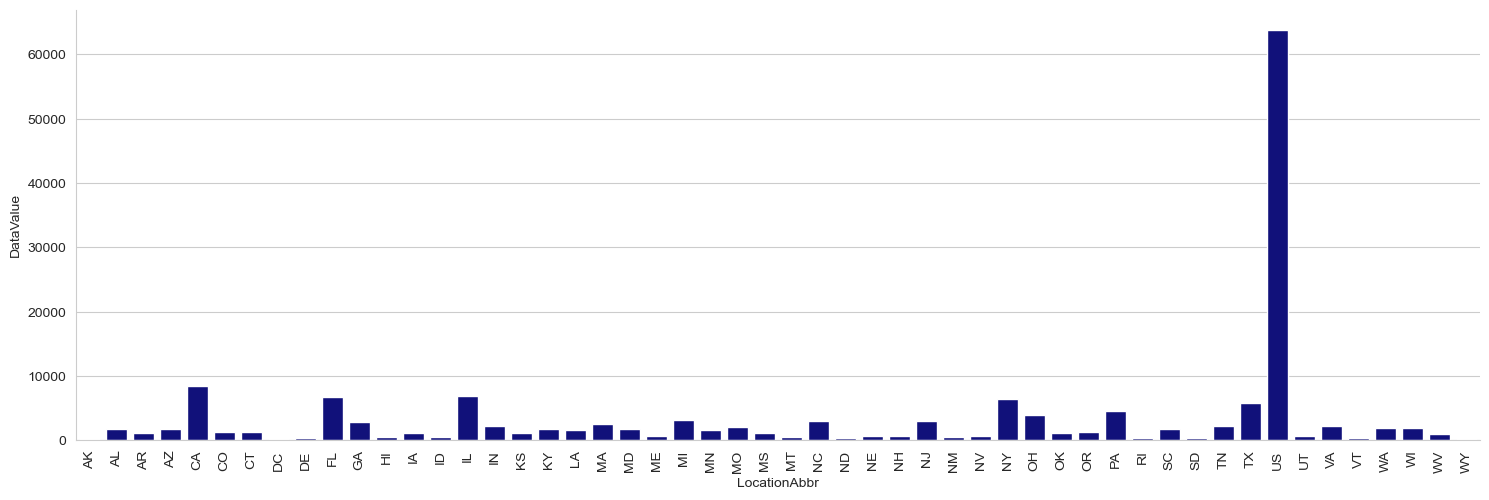

In [37]:
# visualize how the average annual number of cancer deaths has changed over time
# first, use a bar chart to reveal how each state compares to each other
# find the average amount of pollution per state over the time period using agg and np.mean on the DataValue column

# create a new dataframe to groupby the state and aggregate on DataValue by finding the mean of all data for each state
avgCancerByStateDF = avgCancerDF.groupby(["LocationAbbr","LocationDesc"]).agg({"DataValue":np.mean}).reset_index()
# avgCancerByStateDF
# visualize the data using seaborn and a bar chart
sb.catplot(x="LocationAbbr",y="DataValue",data=avgCancerByStateDF,kind="bar",color="darkBlue",aspect=3).set_xticklabels(rotation=90)
# in a bar chart, location will be in the x-axis and the total cancer deaths will be on the y-axis
# visualization reveals that US as a whole is one of the Location abbreviations, so omit US from the dataset so it can 
# be better visualized on a state-by-state basis

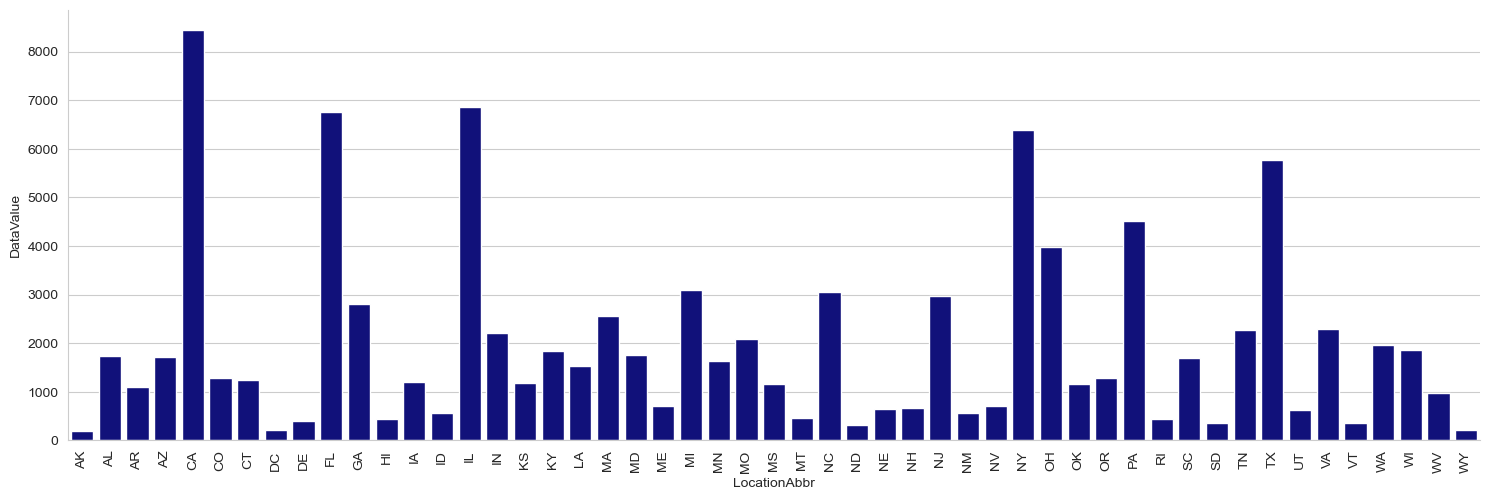

In [38]:
# state-by-state basis (without US as one of the locationAbbr values)
# filter out US using a boolean mask
statewiseCancerDF = avgCancerByStateDF[avgCancerByStateDF["LocationAbbr"]!="US"].reset_index()
# use the same code as above, only with the dataframe set to statewiseCancerDF
sb.catplot(x="LocationAbbr",y="DataValue",data=statewiseCancerDF,kind="bar",color="darkBlue",aspect=3).set_xticklabels(rotation=90)
# California has the highest total cancer deaths, followed by Illinois and Florida, but this is impacted by population size

In [39]:
# to get a better idea of the cancer rates, divide the total cancer deaths (visualized above) by the population size
# access the table of population sizes from wikipedia using BeautifulSoup
# https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_population

import re # import the regular expression module
import requests
from bs4 import BeautifulSoup # import BeautifulSoup

In [40]:
# convert the html to text 
wikipedia = requests.get("https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_population").text
populationSoup = BeautifulSoup(wikipedia,"html.parser") # create a beautifulsoup object
# the first argument is the source and the second is the parser
# now find all the table tags and save them to a list
tableTags = populationSoup.find_all("table")[0] # this locates the first table, which is the table of interest
# access the state names through the "a" tag
# create an empty list to store the state names
statesList = []
for i in tableTags.find_all("a"): # iterate through each "a" tag
    if "[" not in i.text: # if a bracket is not in the text, append the text to the statesList
        statesList.append(i.text)
statesList

['House of Reps.',
 '2022 elections',
 '2022 elections',
 'California',
 'Texas',
 'Florida',
 'New York',
 'Pennsylvania',
 'Illinois',
 'Ohio',
 'Georgia',
 'North Carolina',
 'Michigan',
 'New Jersey',
 'Virginia',
 'Washington',
 'Arizona',
 'Massachusetts',
 'Tennessee',
 'Indiana',
 'Maryland',
 'Missouri',
 'Colorado',
 'Wisconsin',
 'Minnesota',
 'South Carolina',
 'Alabama',
 'Louisiana',
 'Kentucky',
 'Oregon',
 'Oklahoma',
 'Connecticut',
 'Utah',
 'Puerto Rico',
 'Iowa',
 'Nevada',
 'Arkansas',
 'Kansas',
 'Mississippi',
 'New Mexico',
 'Nebraska',
 'Idaho',
 'West Virginia',
 'Hawaii',
 'New Hampshire',
 'Maine',
 'Montana',
 'Rhode Island',
 'Delaware',
 'South Dakota',
 'North Dakota',
 'Alaska',
 'District of Columbia',
 'Vermont',
 'Wyoming',
 'Guam',
 'U.S. Virgin Islands',
 'American Samoa',
 'Northern Mariana Islands',
 'Contiguous United States']

In [41]:
# need to remove things that are not states from the list
# remove the first 3 and last 5 items in the list using their indices
# use slice notation
del statesList[:3] # this will delete the first three items in the list
del statesList[-5:] # this will delete the last 5 things in the list
statesList # now the list only contains states, length of this list (using len()) is 52 since it includes DC and Puerto Rico

['California',
 'Texas',
 'Florida',
 'New York',
 'Pennsylvania',
 'Illinois',
 'Ohio',
 'Georgia',
 'North Carolina',
 'Michigan',
 'New Jersey',
 'Virginia',
 'Washington',
 'Arizona',
 'Massachusetts',
 'Tennessee',
 'Indiana',
 'Maryland',
 'Missouri',
 'Colorado',
 'Wisconsin',
 'Minnesota',
 'South Carolina',
 'Alabama',
 'Louisiana',
 'Kentucky',
 'Oregon',
 'Oklahoma',
 'Connecticut',
 'Utah',
 'Puerto Rico',
 'Iowa',
 'Nevada',
 'Arkansas',
 'Kansas',
 'Mississippi',
 'New Mexico',
 'Nebraska',
 'Idaho',
 'West Virginia',
 'Hawaii',
 'New Hampshire',
 'Maine',
 'Montana',
 'Rhode Island',
 'Delaware',
 'South Dakota',
 'North Dakota',
 'Alaska',
 'District of Columbia',
 'Vermont',
 'Wyoming']

In [57]:
populationNumber = [] # create an empty list to store the population sizes
for i in tableTags.find_all("td"): # the populations are under the td tags
    if "," in i.text and "−" not in i.text: # all the population numbers contain a comma in the table and don't have a dash (negative)
        # if these requirements are met, append the text with the right-hand newline character stripped away to the list
        populationNumber.append(i.text.rstrip())
        
populationActual = populationNumber[::7] # the population numbers occur every 7th instance (there're 7 columns with numbers)
# the last accurate population number is Puerto Rico, after which there are missing values, which throws off the slice notation
# use slice notation to get rid of all the population values after Puerto Rico's
# use the index from statesList of Puerto Rico
prIndex = statesList.index("Puerto Rico") # the index is 30
# use this index to delete all the values after index 30
del populationActual[31:]
populationActual

['40,223,504',
 '30,345,487',
 '22,359,251',
 '20,448,194',
 '13,092,796',
 '12,807,072',
 '11,799,448',
 '10,711,908',
 '10,439,388',
 '10,077,331',
 '9,288,994',
 '8,631,393',
 '7,705,281',
 '7,151,502',
 '7,029,917',
 '6,910,840',
 '6,785,528',
 '6,177,224',
 '6,154,913',
 '5,773,714',
 '5,893,718',
 '5,706,494',
 '5,118,425',
 '5,024,279',
 '4,657,757',
 '4,505,836',
 '4,237,256',
 '3,959,353',
 '3,605,944',
 '3,271,616',
 '3,285,874']

In [58]:
# now use the original populationNumber and find the index to start at for the next state
# the index is 212 for Iowa (comes after Puerto Rico)
# use slice notation to append each of the additional values to the list
# use a for loop to append
for number in populationNumber[212:269:7]: # starting number is 212, step size is 7, more missing values after 268 index
    populationActual.append(number)
for number in populationNumber[273:337:7]: # stalls again at these indices due to missing values in the table
    populationActual.append(number)
# get the last two population numbers for Vermont and Wyoming 
for number in populationNumber[341:349:7]: # these are the indices for population of Vermont and Wyoming+1
    # they were found using populationNumber.index()
    populationActual.append(number)
    
populationActual # return the listpopulationActual) # now this is the same length as the statesList

['40,223,504',
 '30,345,487',
 '22,359,251',
 '20,448,194',
 '13,092,796',
 '12,807,072',
 '11,799,448',
 '10,711,908',
 '10,439,388',
 '10,077,331',
 '9,288,994',
 '8,631,393',
 '7,705,281',
 '7,151,502',
 '7,029,917',
 '6,910,840',
 '6,785,528',
 '6,177,224',
 '6,154,913',
 '5,773,714',
 '5,893,718',
 '5,706,494',
 '5,118,425',
 '5,024,279',
 '4,657,757',
 '4,505,836',
 '4,237,256',
 '3,959,353',
 '3,605,944',
 '3,271,616',
 '3,285,874',
 '3,233,572',
 '3,225,832',
 '3,040,207',
 '2,963,308',
 '2,959,473',
 '2,117,522',
 '1,961,504',
 '1,839,106',
 '1,793,716',
 '1,483,762',
 '1,395,847',
 '1,372,559',
 '1,112,668',
 '1,110,822',
 '1,017,551',
 '908,414',
 '811,044',
 '740,339',
 '670,050',
 '648,279',
 '580,817']

In [59]:
# create a new dictionary to store the state names as keys and the population as the value
statePopulationDict = {}
# use a for loop to iterate through the length of the list
for s in range(0,len(populationActual)):
    # add the state name as the key and the population as the value to the dictionary
    statePopulationDict[statesList[s]] = int(populationActual[s].replace(",","")) # remove the commas from the numbers
    # then convert each string to an integer
    
# return the dictionary
statePopulationDict

{'California': 40223504,
 'Texas': 30345487,
 'Florida': 22359251,
 'New York': 20448194,
 'Pennsylvania': 13092796,
 'Illinois': 12807072,
 'Ohio': 11799448,
 'Georgia': 10711908,
 'North Carolina': 10439388,
 'Michigan': 10077331,
 'New Jersey': 9288994,
 'Virginia': 8631393,
 'Washington': 7705281,
 'Arizona': 7151502,
 'Massachusetts': 7029917,
 'Tennessee': 6910840,
 'Indiana': 6785528,
 'Maryland': 6177224,
 'Missouri': 6154913,
 'Colorado': 5773714,
 'Wisconsin': 5893718,
 'Minnesota': 5706494,
 'South Carolina': 5118425,
 'Alabama': 5024279,
 'Louisiana': 4657757,
 'Kentucky': 4505836,
 'Oregon': 4237256,
 'Oklahoma': 3959353,
 'Connecticut': 3605944,
 'Utah': 3271616,
 'Puerto Rico': 3285874,
 'Iowa': 3233572,
 'Nevada': 3225832,
 'Arkansas': 3040207,
 'Kansas': 2963308,
 'Mississippi': 2959473,
 'New Mexico': 2117522,
 'Nebraska': 1961504,
 'Idaho': 1839106,
 'West Virginia': 1793716,
 'Hawaii': 1483762,
 'New Hampshire': 1395847,
 'Maine': 1372559,
 'Montana': 1112668,
 'Rho

In [60]:
# convert the dictionary to a dataframe with pandas
statePopulationDF = pd.DataFrame.from_dict(statePopulationDict,orient="index")
# give a name to the index
statePopulationDF.index.name = "LocationDesc"
# reset the index so the state can be its own column
populationDF = statePopulationDF.reset_index()
# rename the columns
populationDF.columns = ["LocationDesc","Population"]
populationDF # return the new dataframe

,LocationDesc,Population
0,California,40223504
1,Texas,30345487
2,Florida,22359251
3,New York,20448194
4,Pennsylvania,13092796
5,Illinois,12807072
6,Ohio,11799448
7,Georgia,10711908
8,North Carolina,10439388
9,Michigan,10077331


In [61]:
# merge populationDF with the statewiseCancerDF on "LocationDesc", creating new column for population
perCapitaDF = pd.merge(populationDF,statewiseCancerDF,on="LocationDesc")
# this merge leaves out Puerto Rico since there is no cancer info about it
# create a new column that describes the per capita cancer death rate
# divide the cancer deaths by the population
perCapitaDF["Per Capita Cancer Deaths"] = perCapitaDF["DataValue"]/perCapitaDF["Population"]
perCapitaDF.sort_values("Per Capita Cancer Deaths",ascending=False) # sort from greatest to least per capita cancer deaths
# Vermont has the highest

,LocationDesc,Population,index,LocationAbbr,DataValue,Per Capita Cancer Deaths
49,Vermont,648279,47,VT,356.979362,0.000551
38,West Virginia,1793716,50,WV,965.159690,0.000538
5,Illinois,12807072,14,IL,6859.684524,0.000536
41,Maine,1372559,21,ME,706.176471,0.000514
40,New Hampshire,1395847,30,NH,657.263328,0.000471
25,Kentucky,4505836,17,KY,1838.392622,0.000408
42,Montana,1112668,26,MT,450.501511,0.000405
45,South Dakota,908414,41,SD,363.703125,0.000400
33,Kansas,2963308,16,KS,1181.970455,0.000399
43,Rhode Island,1110822,39,RI,440.758380,0.000397


In [ ]:
alt.data_transformers.disable_max_rows() # disables the error that says exceeds max rows for the chart

In [62]:
# need the ANSI code for the data instead of the FIPS code (like in the API)
# from https://gist.github.com/mbostock/4090848#gistcomment-2102151
# use this csv file and read it into a pandas dataframe
codeDF = pd.read_csv('https://www2.census.gov/geo/docs/reference/state.txt', sep='|') # indicate the columns are separated by "|"
codeDF.columns = ['id', 'abbr', 'LocationDesc', 'statens'] # name the columns
codeDF = codeDF[['id', 'LocationDesc']] # indicate the columns we want in the dataframe

# merge the codeCSV and the perCapita cancer rate on LocationDesc (the state name)
codesAndCapitalDF = pd.merge(perCapitaDF,codeDF,on="LocationDesc")
codesAndCapitalDF

,LocationDesc,Population,index,LocationAbbr,DataValue,Per Capita Cancer Deaths,id
0,California,40223504,4,CA,8439.756198,0.000210,6
1,Texas,30345487,43,TX,5764.228480,0.000190,48
2,Florida,22359251,9,FL,6752.243770,0.000302,12
3,New York,20448194,34,NY,6380.185142,0.000312,36
4,Pennsylvania,13092796,38,PA,4511.710884,0.000345,42
5,Illinois,12807072,14,IL,6859.684524,0.000536,17
6,Ohio,11799448,35,OH,3970.810748,0.000337,39
7,Georgia,10711908,10,GA,2804.606818,0.000262,13
8,North Carolina,10439388,27,NC,3060.755556,0.000293,37
9,Michigan,10077331,22,MI,3100.383260,0.000308,26


In [64]:
# now visualize on a map the per capita cancer deaths in each state
from vega_datasets import data
# upload the data necessary to get states visualization
states = alt.topo_feature(data.us_10m.url, feature='states') # use the feature of states to create lines on the us_10 map
# use the code from above to make a background, which fills it in with gray and outlines the states in white
background = alt.Chart(states).mark_geoshape(fill="lightGray",stroke="white").project("albersUsa").properties(width=800,height=650)

# next, visualize this data across the United States using a cMAP
cMap = alt.Chart(states).mark_geoshape().encode(color=alt.Color("Per Capita Cancer Deaths:Q",scale=alt.Scale(scheme="goldred",reverse=False)),tooltip=["LocationDesc:N","Population:Q","Per Capita Cancer Deaths:Q"]).transform_lookup(lookup="id",from_=alt.LookupData(codesAndCapitalDF,"id",["LocationDesc","Population","Per Capita Cancer Deaths"])).project("albersUsa").properties(width=800,height=650)
# background + cMap
# color should be based on the per capita cancer deaths column, with the scale goldred so changes in this metric can be distinguished
# transform lookup takes the id of the state/location in order to callibrate it to the indicated map (states) and project it with the albersUsa map

background + cMap # visualize the data on top of the background

alt.LayerChart(...)

In [65]:
# now determine how cancer rates have changed throughout the US over this time period
# need to sum up the cancer deaths for each year and compare it to the "US" over the same time period
# use avgCancerDF and groupby the year, then aggregate on the sum of the DataValue column for that year
cancerByYearDF = avgCancerDF.groupby(["YearStart"]).agg({"DataValue":sum}).reset_index()
cancerByYearDF

,YearStart,DataValue
0,2008,17420832.0
1,2009,17498902.0
2,2010,17600116.0
3,2011,17788393.0
4,2012,17957585.0
5,2013,18202453.0
6,2014,18398796.0
7,2015,18560714.0


In [66]:
# compare it to the US only dataframe
usOnlyDF = avgCancerDF[avgCancerDF["LocationAbbr"]=="US"].reset_index()
usOnlyDF = usOnlyDF.groupby(["YearStart"]).agg({"DataValue":sum}).reset_index()
usOnlyDF # this one is probably more accurate since there can be multiple measurements for a single state in a year
# both dataframes reveal that cancer deaths have increased over time
# however, this could be due to an increase in population

,YearStart,DataValue
0,2008,7567579.0
1,2009,7598278.0
2,2010,7639264.0
3,2011,7717414.0
4,2012,7788421.0
5,2013,7892417.0
6,2014,7977127.0
7,2015,8048895.0


In [67]:
# load in the chronic disease indicators for mental health file with pandas
mentalHealthDF = pd.read_csv("U.S._Chronic_Disease_Indicators__Mental_Health.csv")
# retrieve only the columns of interest and drop all null values so we have a complete dataframe
mentalHealthDF = mentalHealthDF[["YearStart","LocationAbbr","LocationDesc","DataValueUnit","DataValueType","DataValue"]].dropna()
mentalHealthDF

,YearStart,LocationAbbr,LocationDesc,DataValueUnit,DataValueType,DataValue
8,2009,WA,Washington,%,Crude Prevalence,12.0
9,2009,GA,Georgia,%,Crude Prevalence,8.2
10,2009,MI,Michigan,%,Crude Prevalence,9.4
13,2009,OR,Oregon,%,Crude Prevalence,12.6
14,2009,AR,Arkansas,%,Crude Prevalence,18.0
...,...,...,...,...,...,...
13195,2020,WY,Wyoming,Number,Age-adjusted Mean,8.5
13196,2020,WY,Wyoming,Number,Age-adjusted Mean,3.9
13197,2020,WY,Wyoming,Number,Age-adjusted Mean,4.1
13198,2020,WY,Wyoming,Number,Mean,5.1


In [68]:
# focus on the US only and the mean number of recent mentally unhealthy days for each year
usOnlyMentalDF = mentalHealthDF.query("LocationAbbr == 'US' and DataValueType == 'Mean'")
# now groupby the year and aggregate on the sum of the data value (since they are all in the same units)
usMentalHealthDF = usOnlyMentalDF.groupby(["YearStart"]).agg({"DataValue":sum}).reset_index()
usMentalHealthDF

,YearStart,DataValue
0,2011,11.4
1,2012,11.5
2,2013,11.0
3,2014,10.7
4,2015,10.9
5,2016,11.2
6,2017,11.7
7,2018,12.1
8,2019,13.0
9,2020,12.7


In [69]:
# merge the mental health and cancer rates dataframes on the years
diseasesDF = pd.merge(usMentalHealthDF,usOnlyDF,on="YearStart") # usOnlyDF is the cancer deaths per year in the US
diseasesDF.columns = ["YearStart","Depression Rate (mean)","Total Cancer Deaths"]
# create a new column that converts YearStart to a datetime object
diseasesDF["Year"] = pd.to_datetime(diseasesDF["YearStart"],format="%Y")
# use lambda and apply to get rid of the month and day in the date time in the "Year" column
diseasesDF["Year"] = diseasesDF["Year"].apply(lambda x:str(x).split("-")[0]) # split on the dash then only take the first thing in the list
# index 0 in the resulting list (after splitting) is the year
diseasesDF

,YearStart,Depression Rate (mean),Total Cancer Deaths,Year
0,2011,11.4,7717414.0,2011
1,2012,11.5,7788421.0,2012
2,2013,11.0,7892417.0,2013
3,2014,10.7,7977127.0,2014
4,2015,10.9,8048895.0,2015


Text(0, 0.5, 'Total Cancer Deaths')

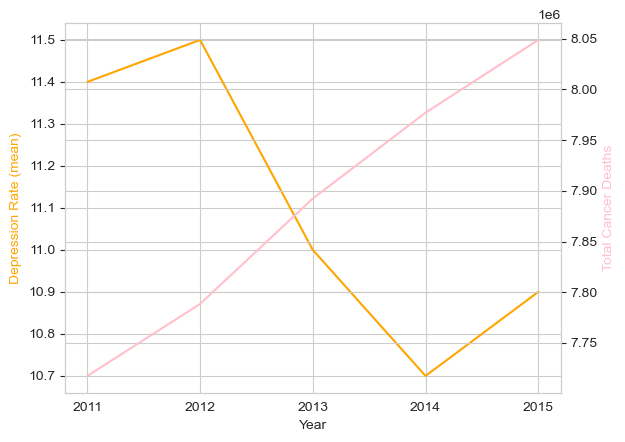

In [70]:
# graph both variables with a line graph over time and then determine statistically if there is a correlation
# graph them on the same axes using matplotlib
import matplotlib.pyplot as plt

# use sb.lineplot
fig,ax1 = plt.subplots()
# subplots returns two values in a tuple for when we have two variables separated by commas
ax1 = sb.lineplot(x="Year",y="Depression Rate (mean)",data=diseasesDF,ax=ax1,color="orange")
ax2 = ax1.twinx() # this creates a second axis object with the two plots sharing the x axis
sb.lineplot(x="Year",y="Total Cancer Deaths",data=diseasesDF,ax=ax2,color="pink") # color sets it to pink

# set the labels so they correspond to the colots of the lines
ax1.set_ylabel("Depression Rate (mean)",color="orange") # specify the label then the color
ax2.set_ylabel("Total Cancer Deaths",color="pink") # this makes the graph easier to read

# the graph shows that the variables are inversely correlated
# depression rates are steadily decreasing whereas cancer rates are steadily increasing

In [71]:
# now run a statistical analysis to determine if the negative correlation is significant
# specify the two variables that will be inputted into the function
depression = np.array(diseasesDF["Depression Rate (mean)"]) # specify the dataframe then the column
cancer = np.array(diseasesDF["Total Cancer Deaths"])

correlation = np.corrcoef(depression,cancer)
correlation # since the correlation coefficient is -.87, there is a fairly strong negative relationship

array([[ 1.        , -0.87029128],
       [-0.87029128,  1.        ]])

In [73]:
# convert the "year" column in the diseasesDF back to an integer so they can be numerically analyzed 
# this allows the diseases and pollutants DFs to be merged on "year"
diseasesDF["Year"] = diseasesDF["Year"].apply(int) # use .apply to convert every year into an integer (instead of a string)
diseasesDF

,YearStart,Depression Rate (mean),Total Cancer Deaths,Year
0,2011,11.4,7717414.0,2011
1,2012,11.5,7788421.0,2012
2,2013,11.0,7892417.0,2013
3,2014,10.7,7977127.0,2014
4,2015,10.9,8048895.0,2015


In [74]:
# since both depression rate and total carbon monoxide have decreased over time
# determine if there is a statistical relationship between these two variables

# since they have to have the same dimensions to put it in a numpy array, merge the dataframes on the year
diseasesPollutantsDF = pd.merge(diseasesDF,pollutantsDF,on="Year")
depression1 = np.array(diseasesPollutantsDF["Depression Rate (mean)"]) # specify the dataframe then the column
carbonMonoxide2 = np.array(diseasesPollutantsDF["Total Carbon Monoxide (ppm)"])

correlation = np.corrcoef(depression1,carbonMonoxide2)
correlation # since the correlation coefficient is 0.28, there is a small positive correlation between depression 
# and carbon monoxide

array([[1.        , 0.28297109],
       [0.28297109, 1.        ]])

In [75]:
# check the correlation between carbon monoxide and cancer
cancer1 = np.array(diseasesPollutantsDF["Total Cancer Deaths"])
ozone = np.array(diseasesPollutantsDF["Total Ozone (ppm)"])

np.corrcoef(cancer1,carbonMonoxide2) # the correlation coefficient is 0.1
# there is an extremely small positive correlation between cancer and carbon monoxide measurements

array([[1.        , 0.10774543],
       [0.10774543, 1.        ]])

In [76]:
# check other correlations with numpy arrays
np.corrcoef(cancer1,ozone) # almost non-existent negative correlation, essentially no correlation

array([[ 1.        , -0.01860019],
       [-0.01860019,  1.        ]])

In [77]:
np.corrcoef(depression1,ozone) # very small positive correlation

array([[1.       , 0.1346676],
       [0.1346676, 1.       ]])

In [ ]:
# essentially, there is no significant correlation between air quality indices (carbon monoxide and ozone)
# and diseases (cancer and depression)
# the most significant relationship was between depression and carbon monoxide, where they have a small positive correlation

# cancer rates per capita and air pollution varied a little bit from location to location, but not enough to draw conclusions
# some other types of air pollution could better correlate if investigated though